# Link Drive with our Google Colab Notebook.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Unzip our Dataset

In [2]:
!unzip "/content/drive/MyDrive/Cat _Dog_detection 8-1-22/Cat_Dog_Detection.zip"

Archive:  /content/drive/MyDrive/Cat _Dog_detection 8-1-22/Cat_Dog_Detection.zip
   creating: Cat_Dog_Detection/
   creating: Cat_Dog_Detection/images/
   creating: Cat_Dog_Detection/images/test/
  inflating: Cat_Dog_Detection/images/test/Cat_ (11).jpg  
  inflating: Cat_Dog_Detection/images/test/Cat_ (3).jpg  
  inflating: Cat_Dog_Detection/images/test/Dog_ (12).jpg  
  inflating: Cat_Dog_Detection/images/test/Dog_ (5).jpg  
   creating: Cat_Dog_Detection/images/train/
  inflating: Cat_Dog_Detection/images/train/Cat_ (1).jpg  
  inflating: Cat_Dog_Detection/images/train/Cat_ (10).jpg  
  inflating: Cat_Dog_Detection/images/train/Cat_ (12).jpg  
  inflating: Cat_Dog_Detection/images/train/Cat_ (13).jpg  
  inflating: Cat_Dog_Detection/images/train/Cat_ (14).jpg  
  inflating: Cat_Dog_Detection/images/train/Cat_ (15).jpg  
  inflating: Cat_Dog_Detection/images/train/Cat_ (16).jpg  
  inflating: Cat_Dog_Detection/images/train/Cat_ (17).jpg  
  inflating: Cat_Dog_Detection/images/train/Ca

# Clone the Yolov5 Repository and install the requirements

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15935, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 15935 (delta 67), reused 75 (delta 52), pack-reused 15831
Receiving objects: 100% (15935/15935), 14.59 MiB | 15.26 MiB/s, done.
Resolving deltas: 100% (10936/10936), done.


In [5]:
!pwd

/content


In [7]:
!pip install -r "/content/yolov5/requirements.txt"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.1/593.1 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.3 MB/s eta 0:00:00


# Set our configuration file

In [8]:
import os
from google.colab.patches import cv2_imshow

In [9]:
with open("train_config.yaml","w") as f:
  f.write("""
  
  # YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 2  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

  
  """
  )

In [10]:
with open("train_data.yaml","w") as f:
  f.write("""
  
  train: "/content/Cat_Dog_detection/images/train"
  val: "/content/Cat_Dog_detection/images/test"
  nc: 2
  names: ["Cat","Dog"]
  """)

# Train our model

In [15]:
!python "/content/yolov5/train.py" \
                 --img 640 \
                 --batch 64 \
                 --epochs 100 \
                 --data "/content/train_data.yaml" \
                 --cfg "/content/train_config.yaml" \
                 --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=/content/train_config.yaml, data=/content/train_data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-175-g5f11555 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=

In [16]:
!pwd

/content


# Test the results with our model

In [21]:
!python "/content/yolov5/detect.py" \
                  --source "/content/Cat_Dog_Detection/images/test/Cat_ (3).jpg"\
                  --weights "/content/yolov5/runs/train/exp3/weights/best.pt" \
                  --conf 0.1

detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=/content/Cat_Dog_Detection/images/test/Cat_ (3).jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-175-g5f11555 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
train_config summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Cat_Dog_Detection/images/test/Cat_ (3).jpg: 640x640 1 Cat, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 5.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp4


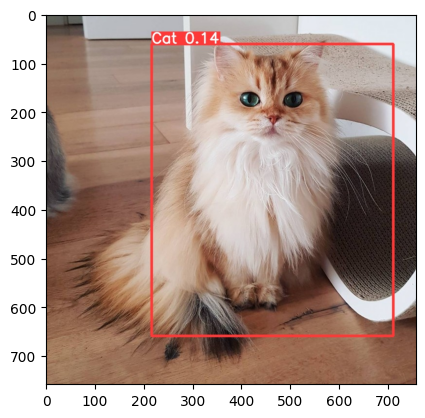

In [22]:
import cv2
import matplotlib.pyplot as plt
im = cv2.imread("/content/yolov5/runs/detect/exp4/Cat_ (3).jpg")[:,:,::-1]
plt.imshow(im)

In [26]:
!python "/content/yolov5/detect.py" \
                  --source "/content/Cat_Dog_Detection/images/test/Dog_ (5).jpg"\
                  --weights "/content/yolov5/runs/train/exp3/weights/best.pt" \
                  --conf 0.1

detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=/content/Cat_Dog_Detection/images/test/Dog_ (5).jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-175-g5f11555 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
train_config summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Cat_Dog_Detection/images/test/Dog_ (5).jpg: 640x416 1 Dog, 39.5ms
Speed: 0.6ms pre-process, 39.5ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp7


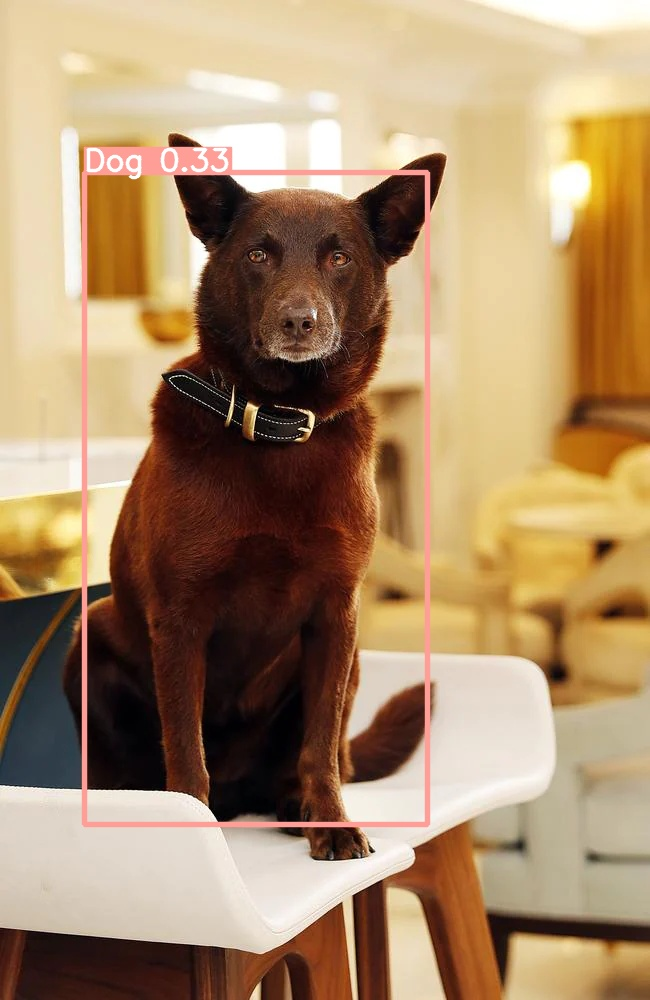

In [27]:
import cv2
import matplotlib.pyplot as plt
im = cv2.imread("/content/yolov5/runs/detect/exp7/Dog_ (5).jpg")
cv2_imshow(im)
# plt.imshow(im)